In [2]:
import pandas as pd

import joblib
import numpy as np 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose





In [3]:
df=pd.read_csv('C:/Users/hp/Desktop/project/data/stock_data_with_sentiment.csv')

# Ensure 'timestamp' is treated as a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Close the connection after loading data




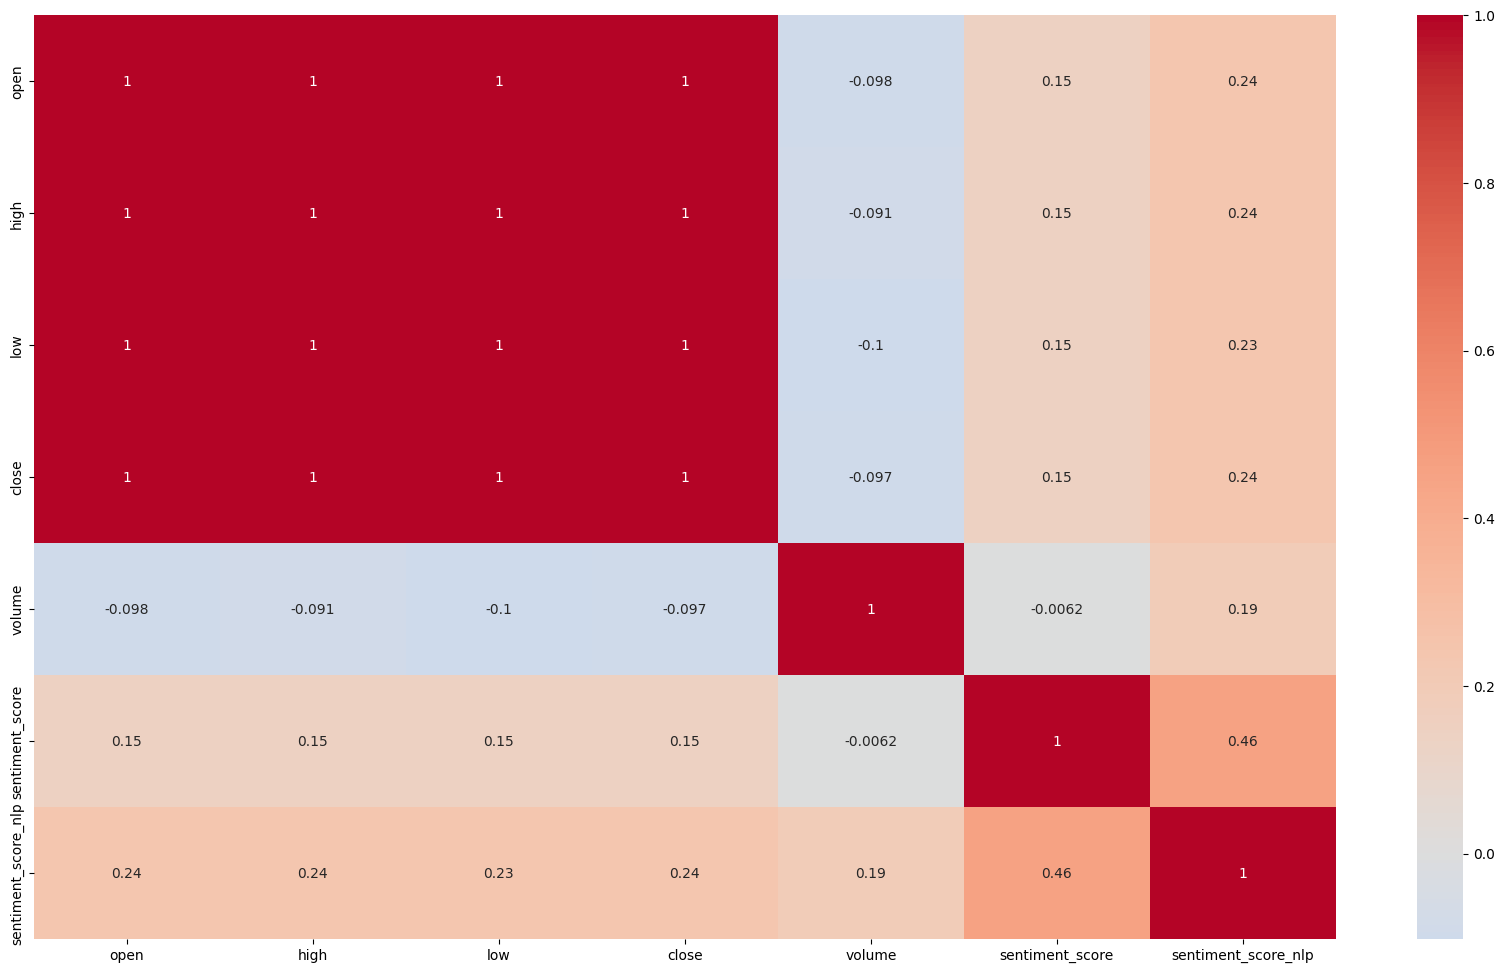

In [4]:
# Calculer la matrice de corrélation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(21,12))
sns.heatmap(correlation_matrix,  annot=True, cmap='coolwarm', center=0)
plt.show()

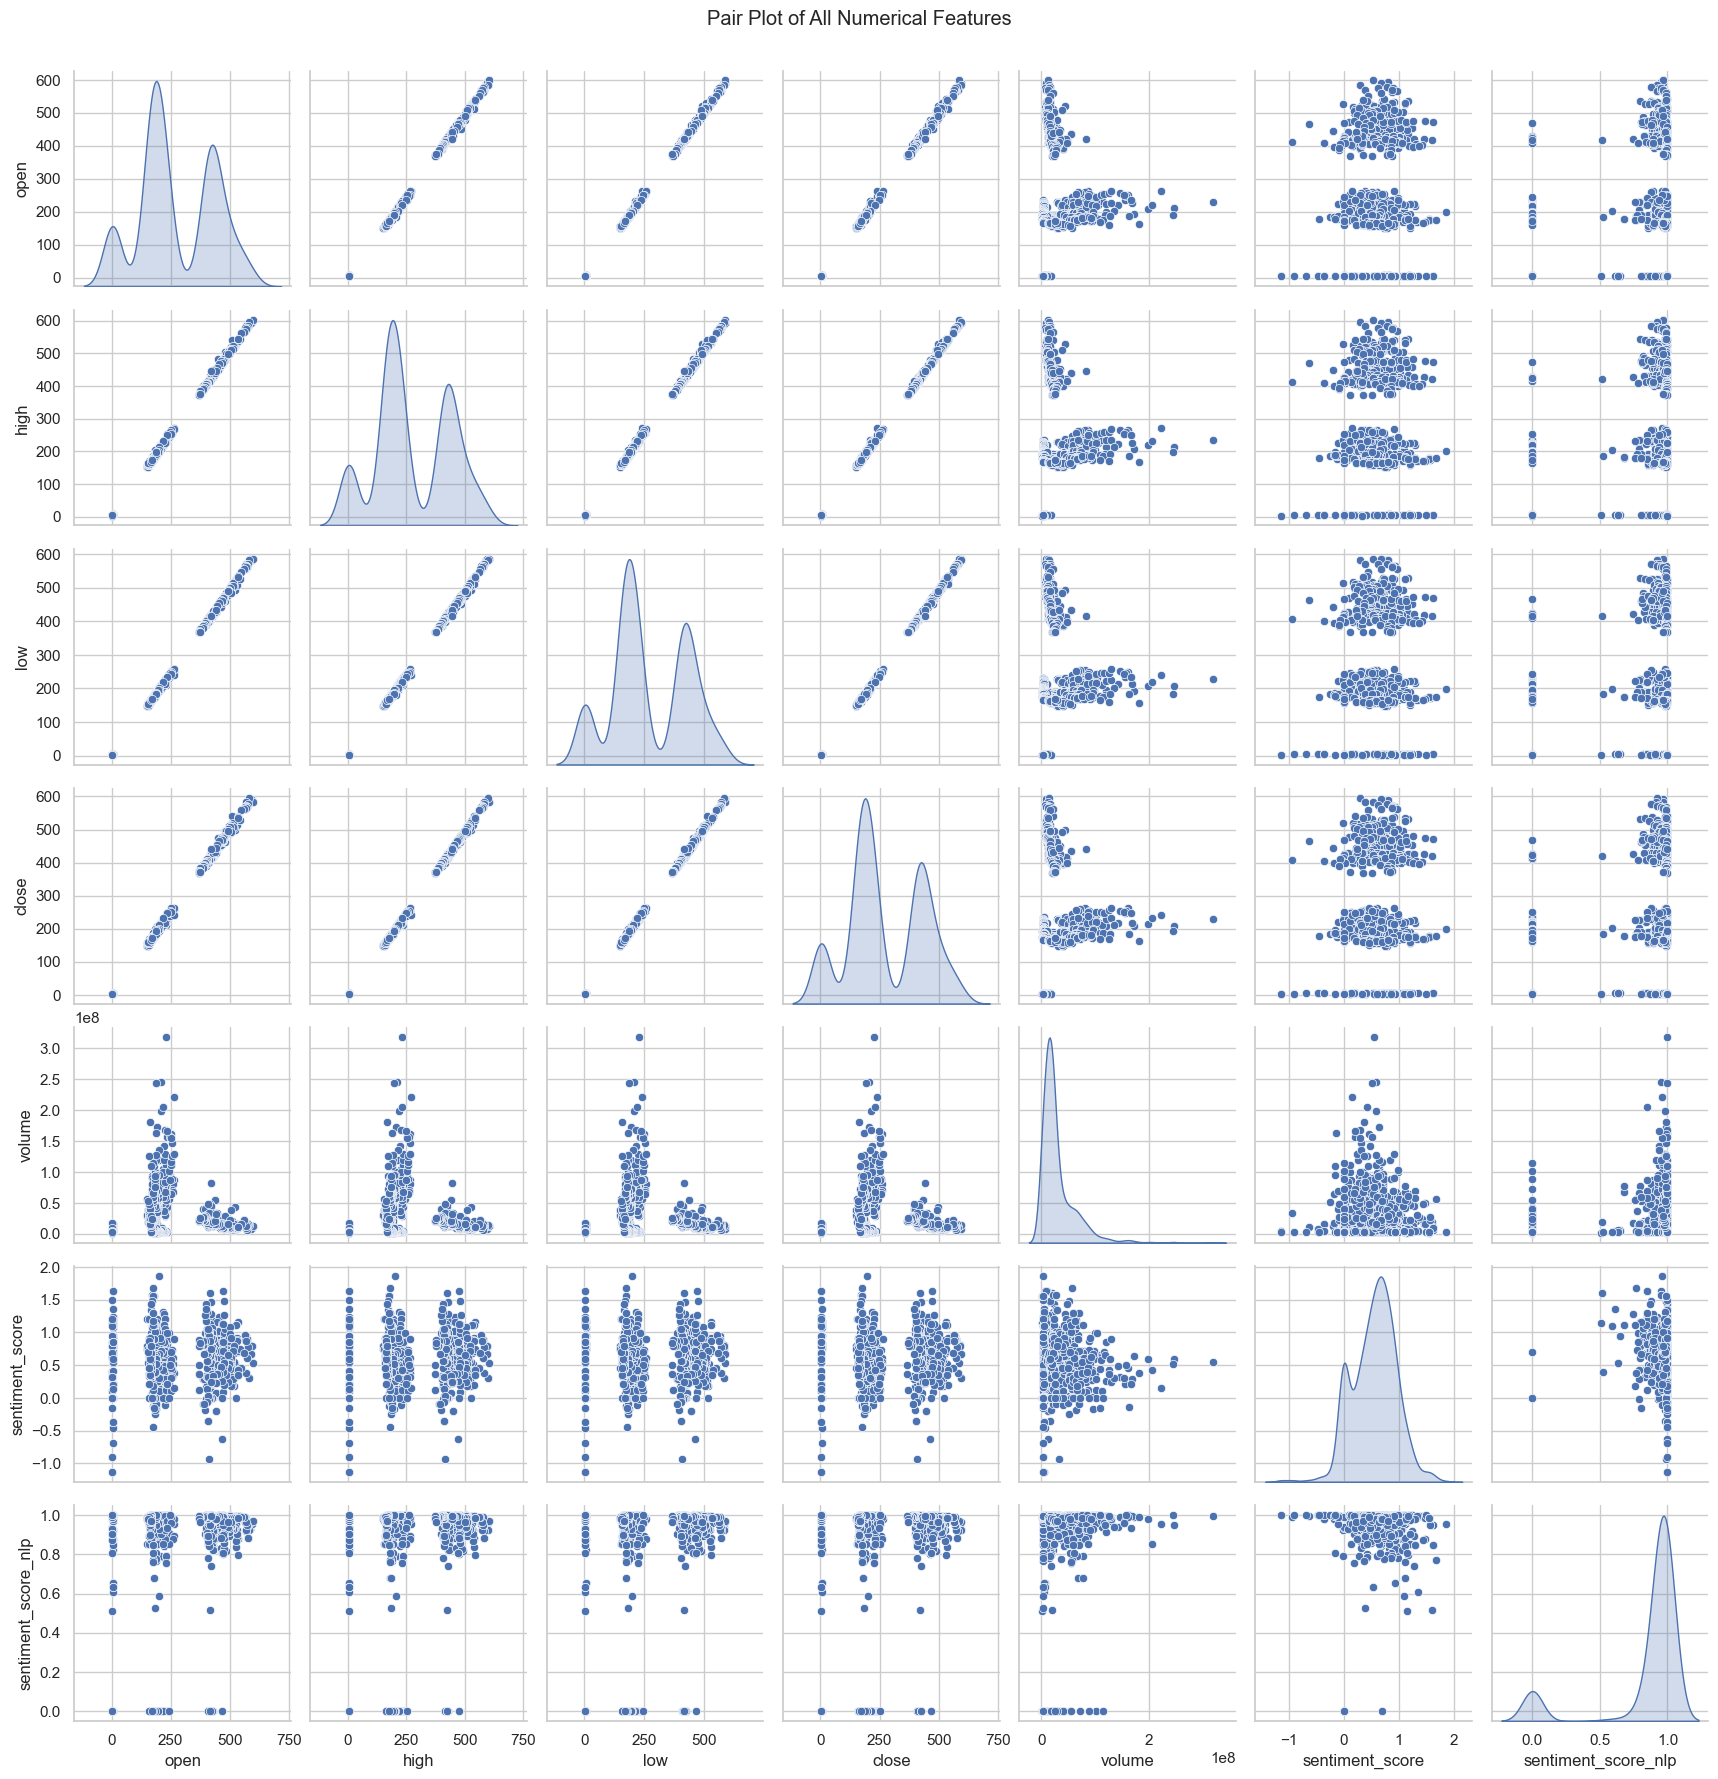

In [5]:
sns.set(style="whitegrid")

# Create a pair plot for all numerical columns
sns.pairplot(df, diag_kind='kde', markers='o')

# Show the plot
plt.suptitle('Pair Plot of All Numerical Features', y=1.02)
plt.show()

In [5]:
df['volume'] = np.log(df['volume'] + 1)
df['rolling_close'] = df['close'].rolling(window=5).mean()
df['rolling_open'] = df['open'].rolling(window=5).mean()
df['rolling_volume'] = df['volume'].rolling(window=5).mean()

# Lag Features
df['sentiment_lag1'] = df['sentiment_score'].shift(1)
df['close_lag1'] = df['close'].shift(1)

# Volatility Measures
df['daily_return'] = df['close'].pct_change()
df['volatility'] = df['daily_return'].rolling(window=5).std()

df['mid_range'] = (df['high'] - df['low']) / 2 + df['low']

# Drop the 'high' and 'low' columns
df = df.drop(columns=['high', 'low'])
average_volume = df['volume'].mean()

# Create the volume-weighted mid range feature
df['volume_weighted_mid_range'] = (df['mid_range'] * df['volume']) / average_volume

# Optionally, create other features as needed
# Example: Mid Range Change Ratio
df['previous_mid_range'] = df['mid_range'].shift(1)  # Shift to get the previous day's mid_range
df['mid_range_change_ratio'] = (df['mid_range'] - df['previous_mid_range']) / df['previous_mid_range'] * df['volume']


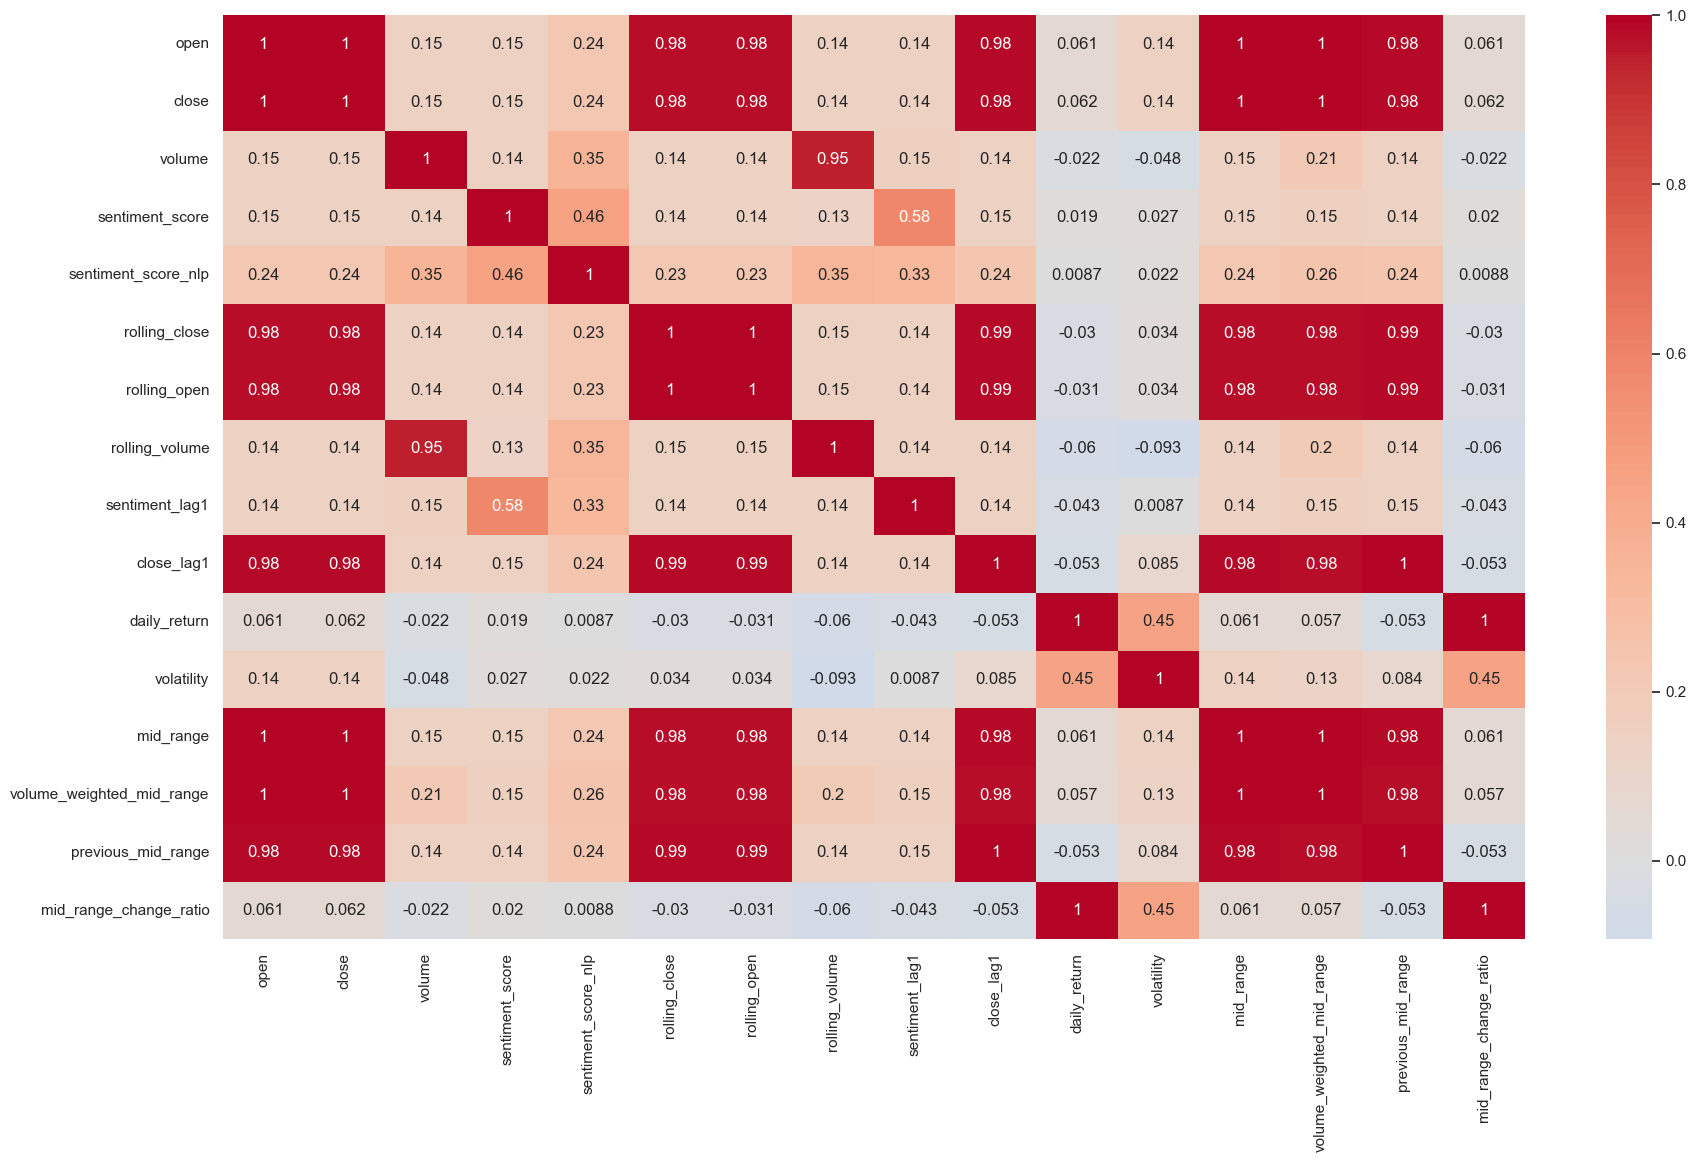

In [7]:
# Calculer la matrice de corrélation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(21,12))
sns.heatmap(correlation_matrix,  annot=True, cmap='coolwarm', center=0)
plt.show()

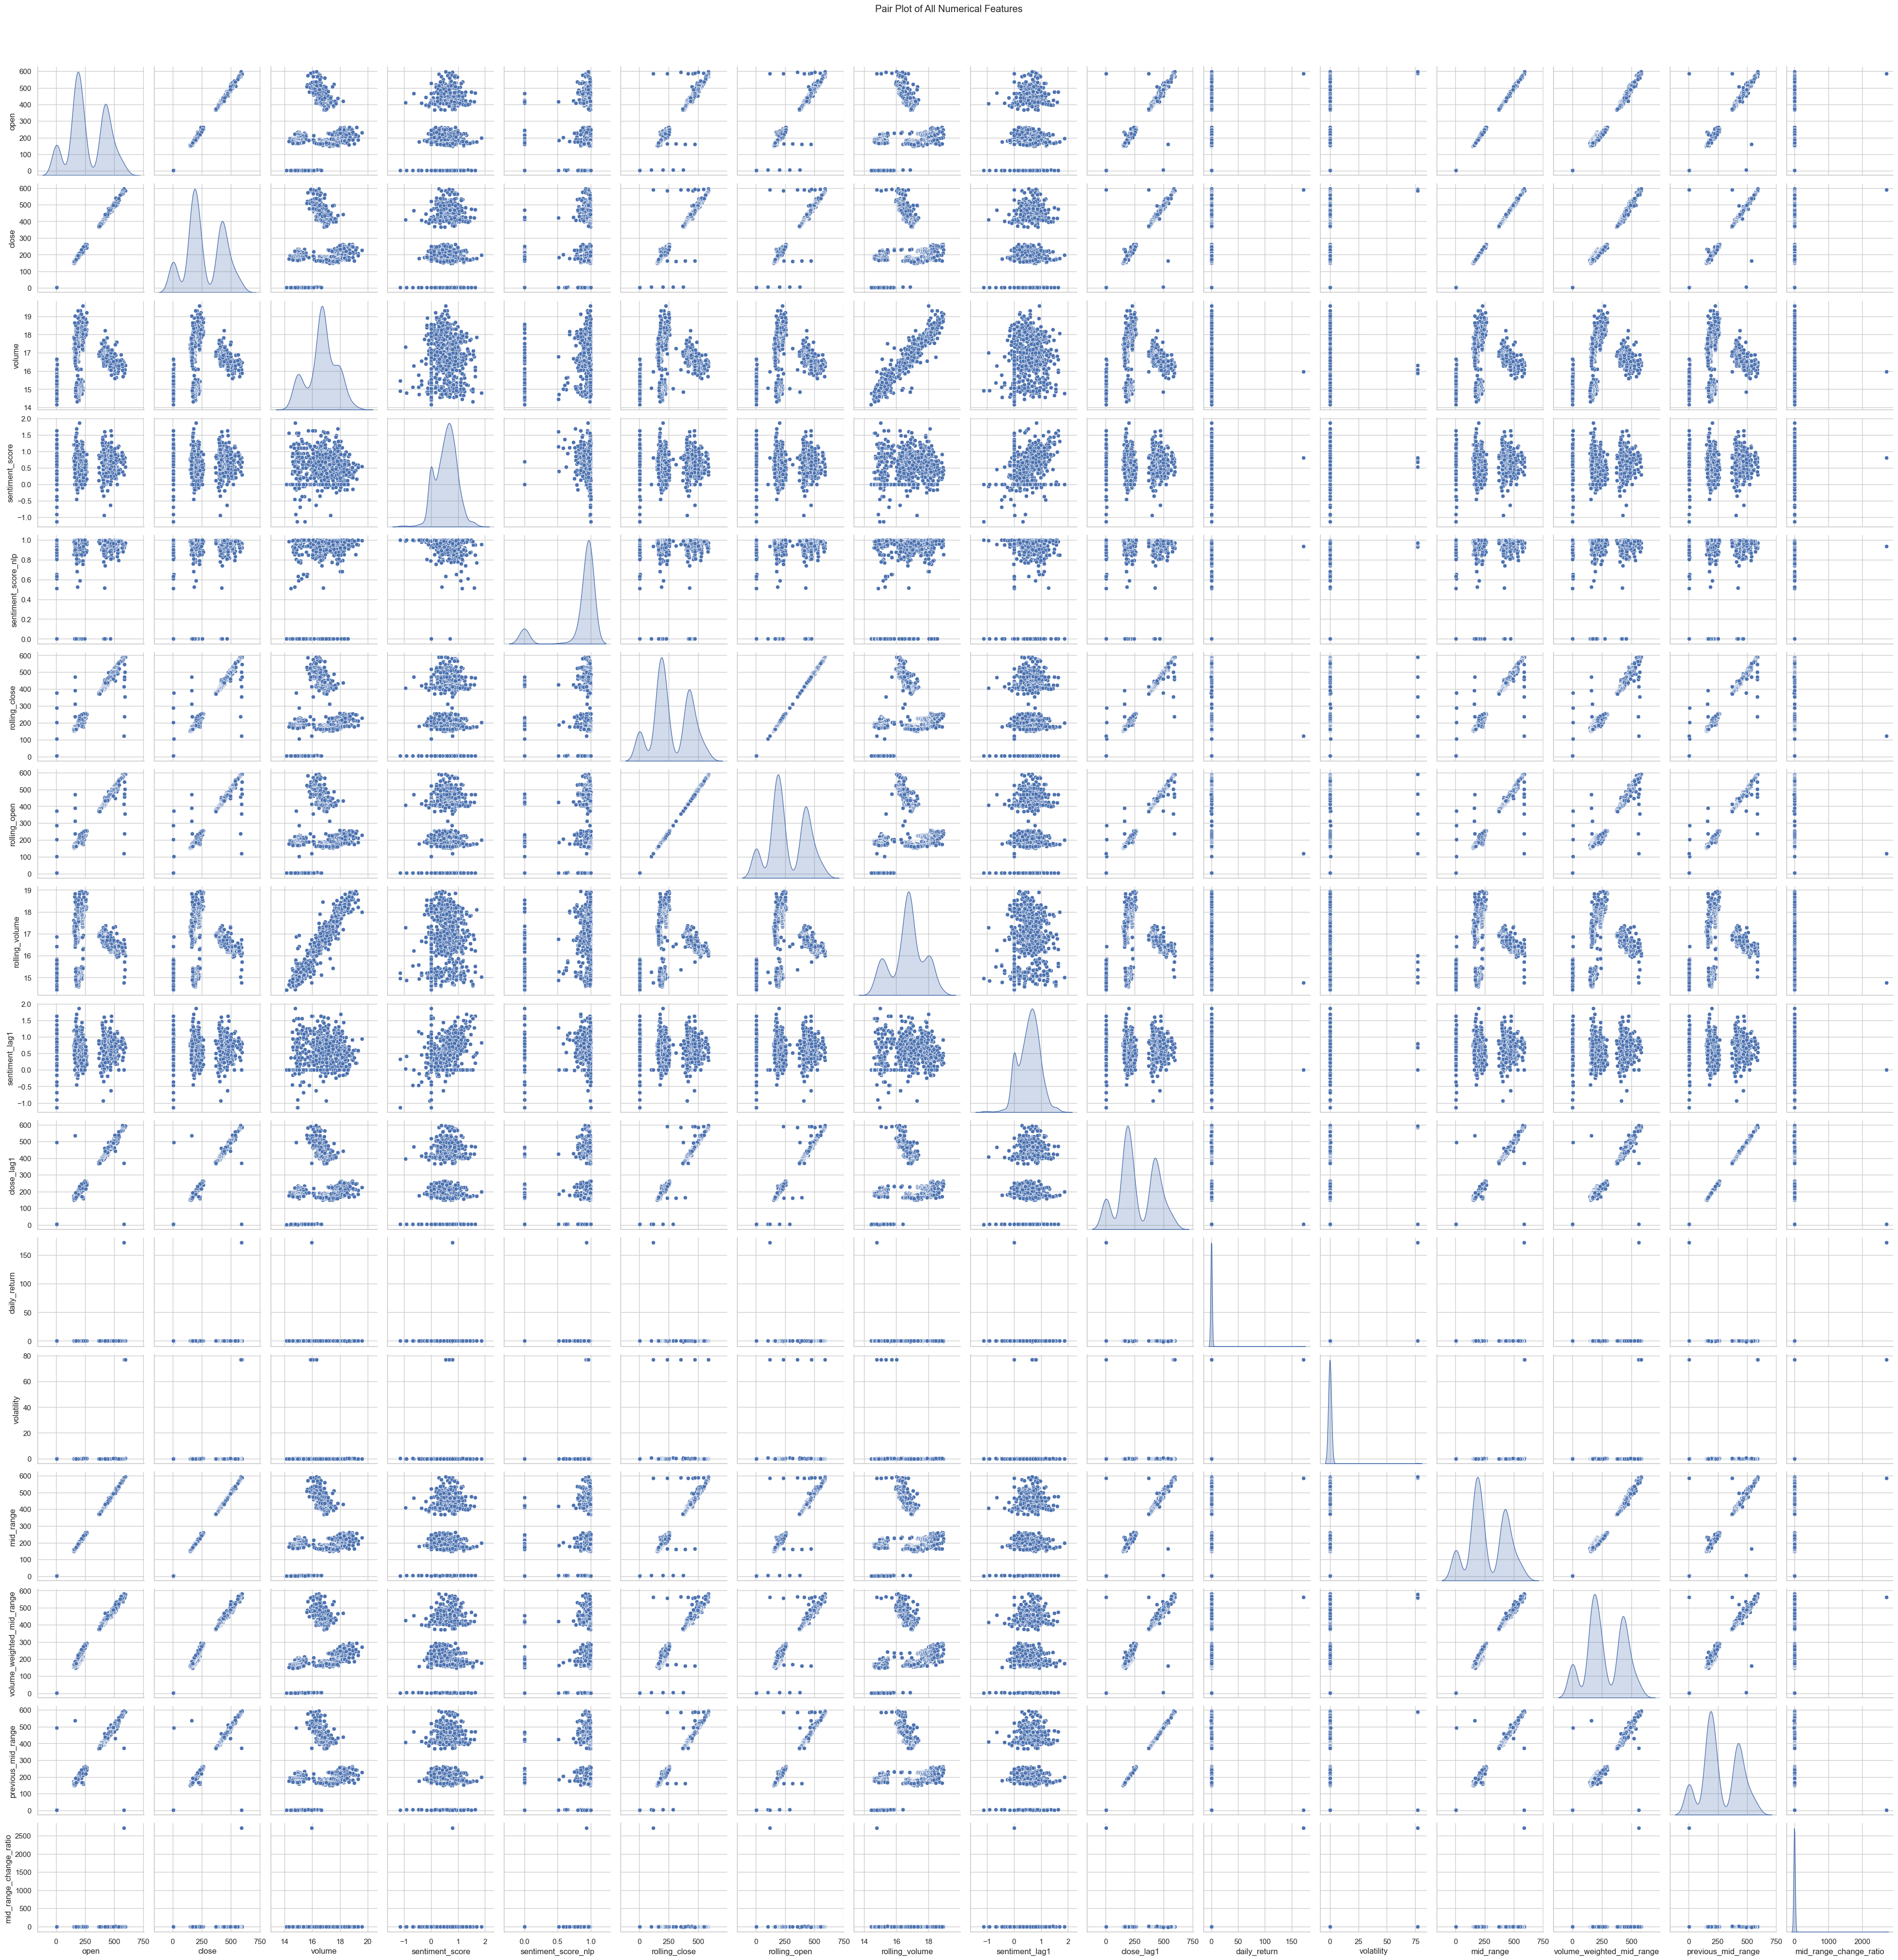

In [6]:
sns.set(style="whitegrid")

# Create a pair plot for all numerical columns
sns.pairplot(df, diag_kind='kde', markers='o')

# Show the plot
plt.suptitle('Pair Plot of All Numerical Features', y=1.02)
plt.show()